In [2]:
import subprocess
def grep(str,file): 
    commande='grep '+str+' '+file
    #print(commande)
    res=subprocess.check_output(commande.split(' '))
    return res.decode().split("\n")[:-1]   # dernière element à enlever car toujours un espaces blanc 

asc=['Phmamm','Phfumi','Cisavi','Cirobu','Moocci','Moocul','Mooccu','Boschl','Boleac','Haaura','Harore']
vert=['Cmil','Lcha','Hsap','Mmus','Ggal','Psin']
outgroupt=['Spur','Apla','Bbel','Blan']
easy='OrthologyRelationships/rootedTrees_withVertebrates_Nomenclature_easy.txt'

In [1]:
with open('hier_1To1_all.txt') as f : 
    lines=f.readlines()
    for line in lines : 
        if len(grep(line.split(' ')[0],'hier_1To1_all.txt'))!=1: 
            print(line.split(' ')[0])

FileNotFoundError: [Errno 2] No such file or directory: 'hier_1To1_all.txt'

In [83]:

with open(easy) as f : 
        cpt=0
        for a in asc : 
                for tree in grep(a,easy): 
                        cpt+=len(tree.split(a+'|'))-1
cpt

70384

In [1]:
human='Outputs/1To1_human.txt'
vertnh='Outputs/1To1_vertnh.txt'
with open(human) as h,open(vertnh) as v : 
    asc_gene=[]
    lines=h.readlines()
    current=''
    for line in lines : 
        if line.split(' ')[0]!=current :
            current=line.split(' ')[0]
            asc_gene.append(current)
    lines=v.readlines()
    for line in lines : 
        if line.split(' ')[0]!=current :
            current=line.split(' ')[0]
            asc_gene.append(current)
len(asc_gene)


60507

In [4]:
file='Outputs/1ToMany_all.txt'
with open(file) as f:
    asc_gene=[]
    lines=f.readlines()
    current=''
    for line in lines : 
        if line.split(' ')[0]!=current :
            current=line.split(' ')[0]
            asc_gene.append(current)
len(asc_gene)


37608

In [16]:
cpt=0
for gene in asc_gene : 
    try : 
        grep(gene,easy)
        cpt+=1
    except subprocess.CalledProcessError : 
        cpt+=0
cpt
#57635 # 20 min d'ececution 

6500

In [22]:
len(asc_gene)

64219

In [6]:
all='OrthologyRelationships/rootedTrees_withVertebrates.txt'
cpt=0
for gene in asc_gene : 
    try : 
        grep(gene,all)
        cpt+=1
    except subprocess.CalledProcessError : 
        print(gene)

In [20]:
cpt-57635

60507

In [9]:
grep('Phmamm|Phmamm.CG.MTP2014.S254.g06199','hier_1ToMany_all.txt')
#grep('Moocci|Moocci.CG.ELv1_2.S469192.g15926',complex)

['Phmamm|Phmamm.CG.MTP2014.S254.g06199 Hsap|ENSG00000174574.15_Name::AKIRIN1;_Syn.16::C1ORF108::FLJ12666',
 'Phmamm|Phmamm.CG.MTP2014.S254.g06199 Hsap|ENSG00000135334.8_Name::AKIRIN2;_Syn.9::C6ORF166::DJ486L4.2::FLJ10342']

In [25]:
import Bio.Phylo as ph
import io
complex='OrthologyRelationships/rootedTrees_withVertebrates_Nomenclature_complex.txt'
with open(complex) as c:  
    line=c.readline()
    nm=0
    while nm<0: 
        line=c.readline()
        nm+=1
   
    tree=ph.read(io.StringIO(line),'newick')
    ph.draw_ascii(tree)

         _ Cmil|SINCAMG00000017407
        |
        |, Ggal|ENSGALG00000006399.1
    ____,|
   |    |, Psin|ENSPSIG00000001653.1
   |    ||
   |    ||  , Hsap|ENSG00000140406.3
   |    ||__|
  _|    |   | Mmus|ENSMUSG00000070462.4
 | |    |
 | |    | Lcha|ENSLACG00000013306
 | |
 | |                ________________ Boschl|Boschl.CG.Botznik2013.chrUn.g6...
 | |_______________|
_|                 |      _ Moocci|Moocci.CG.ELv1_2.S377911.g1080...
 |                 |_____|
 |                       |, Boschl|Boschl.CG.Botznik2013.chrUn.g6...
 |                       ||
 |                        | Boschl|Boschl.CG.Botznik2013.chr9.g55...
 |
 |  ___ Spur|SPU_009703
 |_|
   |__ Apla|Apla.110987767



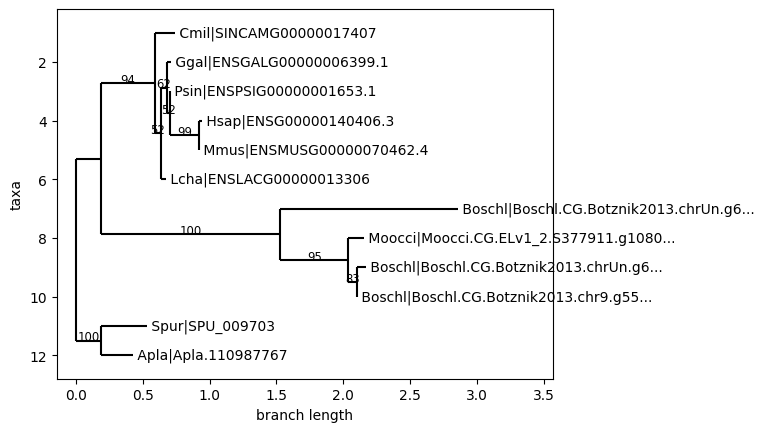

In [21]:
tree=ph.read(io.StringIO(('').join(grep('Boschl|Boschl.CG.Botznik2013.chr9.g55188',complex))),'newick')
ph.draw(tree)

In [92]:
('').join(grep('Moocci|Moocci.CG.ELv1_2.S469192.g15926',complex))

'(((((Spur|SPU_011978:0.372719,Apla|Apla.110973372:0.39682)100:0.207953,((Bbel|Bbel.109478356:0.0416426,Blan|BL10432_evm1:0.0281578)100:0.47999,((((Mmus|ENSMUSG00000028024.14:0.139545,Hsap|ENSG00000138792.9:0.104916)100:0.169782,((Psin|ENSPSIG00000002492.1:0.186096,Psin|ENSPSIG00000002521.1:0.0285953)100:0.0976085,Ggal|ENSGALG00000012108.4:0.165825)90:0.0537825)76:0.0495829,(Lcha|ENSLACG00000002781:0.323642,Cmil|SINCAMG00000015293:0.316518)58:0.0242354)100:0.348294,((Moocul|Moocul.CG.ELv1_2.S42447.g02191_Hsap/ENSG00000138792.9@a:0.653533,((Phmamm|Phmamm.CG.MTP2014.S1144.g13864_Hsap/ENSG00000138792.9@a:0.200245,(Cirobu|KH.C12.644.v2.A.ND2-1_Hsap/ENSG00000138792.9:0.214593,(Phmamm|Phmamm.CG.MTP2014.S1144.g13863_Hsap/ENSG00000138792.9@b:0.0827105,Phfumi|Phfumi.CG.MTP2014.S5297.g06854_Hsap/ENSG00000138792.9:0.0416003)100:0.164033)83:0.0469822)99:0.131863,((Boschl|Boschl.CG.Botznik2013.chrUn.g41800_Hsap/ENSG00000138792.9@a:0.330913,((Boleac|Boleac.CG.SB_v3.S19.g04210_Hsap/ENSG00000138792.9@

In [92]:
def grepog(g,file):
    commande='grep '+g.split('|')[1]+' '+file
    res=subprocess.check_output(commande.split(' '))
    res=res.decode().split("\n")[:-1]
    l=[]
    for rel in res : 
        if rel.split(' ')[0]==g :
                l.append(rel.split(' ')[1])
        if rel.split(' ')[1]==g: 
            l.append(rel.split(' ')[0])
    l=list(set(l))
    return l
#grepog('Phmamm|Phmamm.CG.MTP2014.S1066.g13517','OrthologyRelationships/rootedTre_orthology1To1.txt')
grepog('Cirobu|KH.C4.53','OrthologyRelationships/rootedTre_orthology1To1.txt')

['Bbel|Bbel.109465168',
 'Blan|BL04349_evm0',
 'Moocul|Moocul.CG.ELv1_2.S105481.g10097',
 'Apla|Apla.110985318',
 'Hsap|ENSG00000211450.9',
 'Mmus|ENSMUSG00000076437.10',
 'Cmil|SINCAMG00000005841',
 'Moocci|Moocci.CG.ELv1_2.S289628.g07161']

In [79]:
'Cirobu|KH.C4.536.v1.A.ND1-1'=='Cirobu|KH.C4.53'

False

In [51]:
def grepsp(str,file): 
    commande='grep '+str+' '+file
    commande=commande.split(' ')
    commande[1]=commande[1]
    res1=subprocess.check_output(commande)
    res1=res1.decode().replace("\n",' ').split(' ')[:-1]  # Last element is a '' so let's remove it 
    l=res1
    return l
grep('Phmamm.CG.MTP2014.S1066.g13517','OrthologyRelationships/rootedTre_orthology1To1.txt')

['Phfumi|Phfumi.CG.MTP2014.S4997.g06676 Phmamm|Phmamm.CG.MTP2014.S1066.g13517']